<a href="https://colab.research.google.com/github/rdrudi/PythonDataAnalysis/blob/master/wdbcKNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wisconsin Breast Cancer KNN Classifier
## K-Nearest Neighbors
O código implementa um previsor KNN utilizando o KNeighborsClassifier do SciKit-Learn   

Dataset utilizado: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [11]:
# imports
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
# algorithm initial setup
divisao = 0.8 # split rate
k = 7 # number of neighbors
semente = 6  # random seed - for reproducibility 

In [12]:
# A função plt3D plota uma visualização tridimensional do dataset
def plt3D(dados):
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')
    ax.set_xlabel('Raio')
    ax.set_ylabel('Textura')
    ax.set_zlabel('Perímetro')
    for row in dados:
        x,y,z = row[2],row[3],row[4];
        tipo = row[1]
        if (tipo == 'M'): 
            ax.scatter(x,y,z,c='r',marker='o')
        else:
            ax.scatter(x,y,z,c='b',marker='s')
    legBen = matplotlib.lines.Line2D([0],[0], linestyle="none", c='b', marker = 's')
    legMal = matplotlib.lines.Line2D([0],[0], linestyle="none", c='r', marker = 'o')
    ax.legend([legBen,legMal], ['Benigno', 'Maligno'], numpoints = 1)
    fig.show()

In [13]:
# loading the dataset
url = 'https://raw.githubusercontent.com/rdrudi/PythonDataAnalysis/master/wdbcKNN/wdbc.xlsx?raw=true'
dsp = pd.read_excel(url,sheet_name='wdbc')
dsn = np.array(dsp)

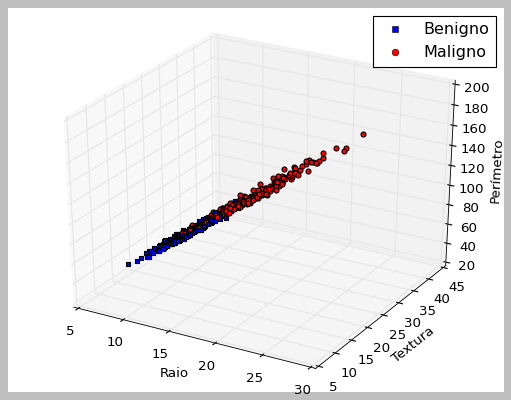

In [17]:
# plotting the data
plt.style.use('classic');
plt3D(dsn)

In [19]:
# training and test data split
xTreina,yTreina,xTeste,yTeste = [],[],[],[]
random.seed(semente)
for amostra in dsn:
    sorteio = random.random()
    if (sorteio < divisao):
        xTreina.append(amostra[2:])
        yTreina.append(amostra[1])
    else:
        xTeste.append(amostra[2:])
        yTeste.append(amostra[1])
#print(xTreina)
#print(yTreina)

In [22]:
# training the knn classifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(xTreina,yTreina)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [23]:
# making predictions
predicoes = knn.predict(xTeste)
total = len(predicoes)
acertos = 0
for i in range(total):
    if (yTeste[i] == predicoes[i]):
        acertos += 1
print("Percentual de Acertos = ",(round((acertos*100/total),1)))

Percentual de Acertos =  92.1
